# kNN predictor for Fisher Iris
Data Analysis - ISAE 2019/2020 - Ahmad Berjaoui

In [1]:
import os #path handling
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix

In [2]:
dataPath = '/home/aberjaoui/Documents/ISAE_data_analysis_students/data/Iris/' # path to folder containing the Iris data
dataFile = os.path.join(dataPath,'correctedIris.data') # data file to use

## 1 - Data import and formatting 

In [3]:
# we assign column names based on the description file. 'FType' stands for 'Flower Type'
fullDF = pd.read_csv(dataFile,header=None,names=['sepalL','sepalW','petalL','petalW','FType']) 
fullDF.sample(10) # let's take a random sample from the full data frame

,sepalL,sepalW,petalL,petalW,FType
96,5.7,2.9,4.2,1.3,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa


In [4]:
fullDF.describe() # quick statistical description of the dataframe

,sepalL,sepalW,petalL,petalW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Let's define a mapping function from 'Flower type' to a class number
def dataMap(FType):
  """
  Data mapping function. Assigns a class number, given a class name
  Args:
    FType: (str) Flower type
  Returns: (int) Flower class
  """
  mapping = {'Iris-versicolor': 0,
            'Iris-setosa': 1,
            'Iris-virginica': 2}
  return mapping[FType]

In [6]:
# Let's apply the mapping function to the input data and create a new column called 'Y'
fullDF['Y'] = [dataMap(item) for item in fullDF['FType']]

In [7]:
# Let's check that mapping works on a few random samples
fullDF.sample(10)

,sepalL,sepalW,petalL,petalW,FType,Y
126,6.2,2.8,4.8,1.8,Iris-virginica,2
128,6.4,2.8,5.6,2.1,Iris-virginica,2
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
58,6.6,2.9,4.6,1.3,Iris-versicolor,0
67,5.8,2.7,4.1,1.0,Iris-versicolor,0
111,6.4,2.7,5.3,1.9,Iris-virginica,2
56,6.3,3.3,4.7,1.6,Iris-versicolor,0
9,4.9,3.1,1.5,0.1,Iris-setosa,1
84,5.4,3.0,4.5,1.5,Iris-versicolor,0
78,6.0,2.9,4.5,1.5,Iris-versicolor,0


In [8]:
# Separate data from classes
dataDF = fullDF[['sepalL','sepalW','petalL','petalW']]
classDF = fullDF['Y']

## 2 - Data splitting 

In [9]:
# Let's split the data into training data, and test data. Same splitting should be applied to classes.
# Here, the test data size is 10% of the full dataset
trainData,testData,trainY,testY = train_test_split(dataDF,classDF,test_size=0.1)

## 3 - kNN 

In [10]:
# Let's build a kd Tree out of our training data and use euclidian distance as a metric.
# This can be replaced by a custom metric
kNN = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
kNN.fit(trainData,trainY)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
# Check the classifier's performance on the training data
trainPredictions = kNN.predict(trainData)
trainCM = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM)

[[41  0  3]
 [ 0 46  0]
 [ 3  0 42]]


## 4 - Classifier performance 

In [12]:
# Check the classifier's performance on the test data
predictions = kNN.predict(testData)
testCM = confusion_matrix(y_pred=predictions,y_true=testY)
print(testCM)

[[6 0 0]
 [0 4 0]
 [0 0 5]]


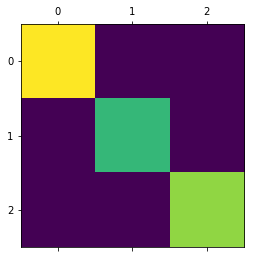

In [13]:
# You can also plot the confusion matrix
plt.matshow(testCM)